In [2]:
##hola!!!
from google.cloud import bigquery

# Conectar al cliente de BigQuery
client = bigquery.Client()

# Referencia al dataset
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# Listar las tablas del dataset
tables = client.list_tables(dataset_ref)

# Mostrar las primeras tablas
for table in tables:
    print(table.table_id)

# Seleccionar la tabla gsod1929 y obtener las primeras filas
table_ref = client.dataset("openaq", project="bigquery-public-data").table("global_air_quality")
rows = client.list_rows(table_ref, max_results=10000)
df_noaa = rows.to_dataframe()

# Mostrar las primeras filas
df_noaa.head()

c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


global_air_quality


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)


In [3]:
# Consulta para obtener los distintos países
query_countries = """
    SELECT DISTINCT country
    FROM `bigquery-public-data.openaq.global_air_quality`
    ORDER BY country
"""

# Ejecutar la consulta para obtener los países y ver los resultados
df_countries = client.query(query_countries).to_dataframe()

# Imprimir los países únicos que están en la base de datos
print(df_countries)


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


    country
0        AD
1        AE
2        AF
3        AR
4        AT
..      ...
106      UZ
107      VM
108      VN
109      XK
110      ZA

[111 rows x 1 columns]


In [4]:
# Consulta para contar cuántas ciudades hay por cada país
query_city_count = """
    SELECT 
      country,
      COUNT(DISTINCT city) AS city_count  -- Contar las ciudades únicas por país
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    GROUP BY 
      country
    ORDER BY 
      city_count DESC
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_city_count = client.query(query_city_count).to_dataframe()

# Mostrar el resultado
print(df_city_count)


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


    country  city_count
0        US         826
1        CN         394
2        IN         265
3        PL         207
4        GB         158
..      ...         ...
106      KU           1
107      PH           1
108      NG           1
109      NI           1
110      SG           1

[111 rows x 2 columns]


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(
C:\Users\crist\AppData\Local\Temp\ipykernel_28148\2860350865.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city_count', y='country', data=top_5_countries, palette='viridis')


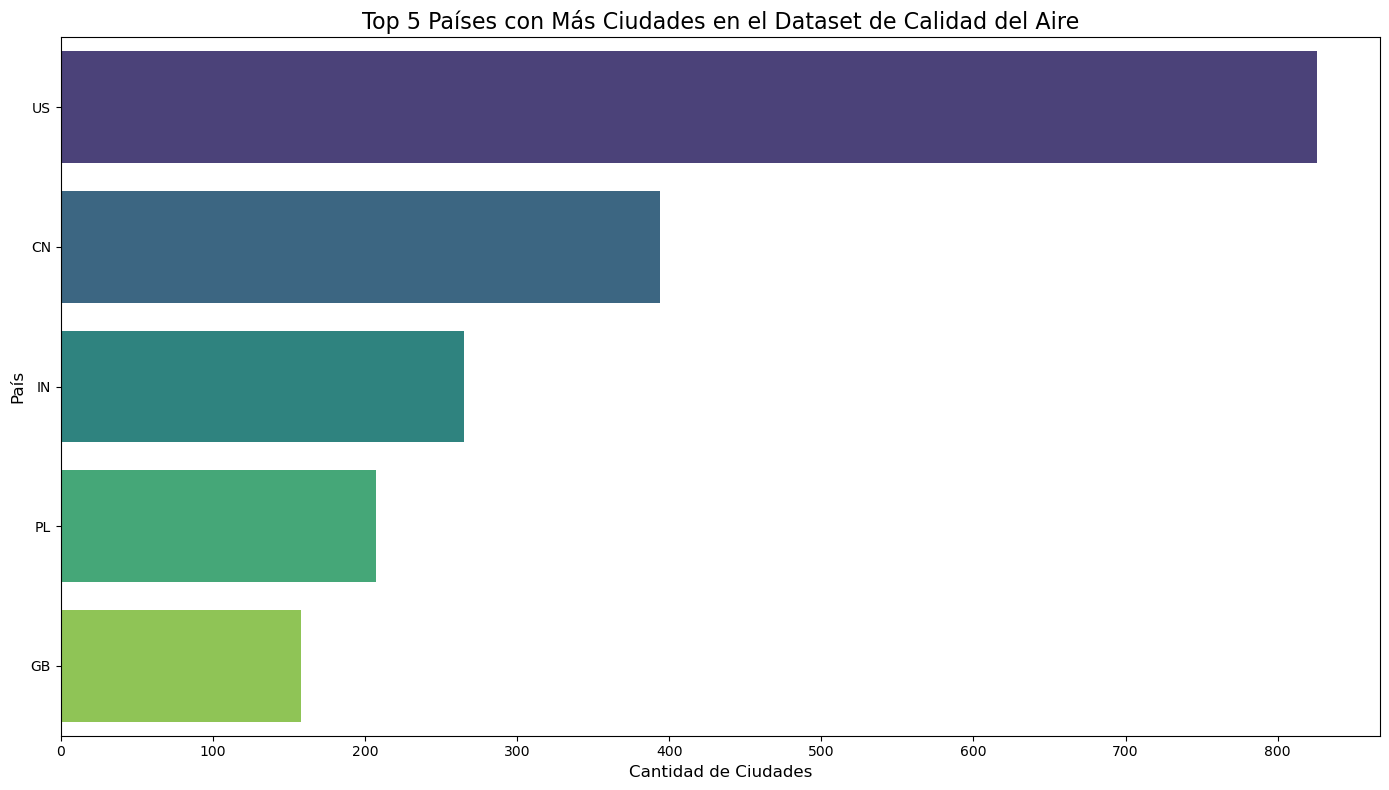

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta para contar cuántas ciudades hay por cada país
query_city_count = """
    SELECT 
      country,
      COUNT(DISTINCT city) AS city_count  -- Contar las ciudades únicas por país
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    GROUP BY 
      country
    ORDER BY 
      city_count DESC
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_city_count = client.query(query_city_count).to_dataframe()

# Filtrar los 5 países con más ciudades
top_5_countries = df_city_count.head(5)

# Crear un gráfico de barras para los 5 países con más ciudades
plt.figure(figsize=(14, 8))
sns.barplot(x='city_count', y='country', data=top_5_countries, palette='viridis')

# Títulos y etiquetas
plt.title('Top 5 Países con Más Ciudades en el Dataset de Calidad del Aire', fontsize=16)
plt.xlabel('Cantidad de Ciudades', fontsize=12)
plt.ylabel('País', fontsize=12)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ejecutar la consulta para obtener los datos en un DataFrame
query = """
    SELECT 
      city, 
      latitude, 
      longitude, 
      pollutant, 
      AVG(value) AS avg_value,  -- Promedio de los valores para cada contaminante en cada ciudad
      COUNT(*) AS count  -- Número de registros para cada contaminante en cada ciudad
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'
    GROUP BY 
      city, latitude, longitude, pollutant
    ORDER BY 
      count DESC
    LIMIT 1000
"""
df_cities_pollutants = client.query(query).to_dataframe()

# Mostrar las primeras filas para verificar los resultados
print(df_cities_pollutants.head())

# Agrupar los datos por contaminante y contar la cantidad de ciudades
df_pollutant_city_count = df_cities_pollutants.groupby('pollutant')['count'].sum().reset_index()

# Ordenar por la cantidad de ciudades
df_pollutant_city_count = df_pollutant_city_count.sort_values('count', ascending=False)


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                               city  latitude  longitude pollutant  avg_value  \
0       San Luis Obispo-Paso Robles       1.0  35.259473      pm25   8.081886   
1                        CHARLESTON       1.0  32.840000      pm25   7.656875   
2       San Luis Obispo-Paso Robles       1.0  35.259473      pm10  21.672932   
3                        WASHINGTON       1.0  41.550658      pm25   3.712428   
4  Riverside-San Bernardino-Ontario       1.0  33.999449        co   0.221574   

   count  
0    806  
1    800  
2    798  
3    692  
4    686  


In [7]:
# Consulta para obtener todas las ciudades de los Estados Unidos
query_us_cities = """
    SELECT 
      DISTINCT city  -- Selecciona solo las ciudades únicas
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'  -- Filtrar solo las ciudades de EE.UU.
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_us_cities = client.query(query_us_cities).to_dataframe()

# Imprimir los nombres de todas las ciudades de EE.UU.
print("Ciudades de EE. UU.:")
print(df_us_cities['city'])


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Ciudades de EE. UU.:
0                Seattle-Tacoma-Bellevue
1      Providence-New Bedford-Fall River
2           Portland-Vancouver-Beaverton
3          Milwaukee-Waukesha-West Allis
4                                 HOWARD
                     ...                
821                               MOFFAT
822                                  KAY
823                              CAMERON
824                College Station-Bryan
825                                  077
Name: city, Length: 826, dtype: object


In [8]:
# Consulta para obtener todas las ciudades de los Estados Unidos
query_us_cities = """
    SELECT 
      DISTINCT city  -- Selecciona solo las ciudades únicas
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'  -- Filtrar solo las ciudades de EE.UU.
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_us_cities = client.query(query_us_cities).to_dataframe()

# Función para buscar una ciudad en el DataFrame de ciudades de EE. UU.
def buscar_ciudad(ciudad):
    # Filtrar las ciudades que contienen el nombre de la ciudad buscada (sin distinguir mayúsculas/minúsculas)
    ciudades_encontradas = df_us_cities[df_us_cities['city'].str.contains(ciudad, case=False, na=False)]
    
    # Imprimir los resultados
    if not ciudades_encontradas.empty:
        print(f"Ciudades encontradas que contienen '{ciudad}':")
        print(ciudades_encontradas['city'])
    else:
        print(f"No se encontraron ciudades que contengan '{ciudad}' en EE. UU.")

# Buscar una ciudad específica
buscar_ciudad('bangor')
buscar_ciudad('cameron')  # Aquí puedes cambiar el nombre de la ciudad por la que deseas buscar


Ciudades encontradas que contienen 'bangor':
266    Bangor
Name: city, dtype: object
Ciudades encontradas que contienen 'cameron':
823    CAMERON
Name: city, dtype: object


In [9]:
from google.cloud import bigquery

# Crear un cliente de BigQuery
client = bigquery.Client()

# Consulta SQL
query = """
    SELECT city, latitude, longitude  
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = 'US'
    LIMIT 1000
"""

# Ejecutar la consulta y obtener los datos en un DataFrame
df_cities = client.query(query).to_dataframe()

# Mostrar las primeras filas del DataFrame
print(df_cities)



c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


                                  city  latitude  longitude
0              Seattle-Tacoma-Bellevue       1.0  47.597222
1    Providence-New Bedford-Fall River       1.0  41.807523
2         Portland-Vancouver-Beaverton       1.0  45.558081
3        Milwaukee-Waukesha-West Allis       1.0  43.498100
4                               HOWARD       1.0  39.143197
..                                 ...       ...        ...
995    Washington-Arlington-Alexandria       1.0  39.055302
996    Washington-Arlington-Alexandria       1.0  39.055302
997     San Jose-Sunnyvale-Santa Clara       1.0  37.338202
998  Providence-New Bedford-Fall River       1.0  41.807523
999      San Francisco-Oakland-Fremont       1.0  37.793624

[1000 rows x 3 columns]


In [10]:
# Ejecutar la consulta para obtener los datos en un DataFrame
query = """
    SELECT 
      city, 
      ST_X(location_geom) AS longitude,  -- Extraer longitud
      ST_Y(location_geom) AS latitude,   -- Extraer latitud
      pollutant, 
      AVG(value) AS avg_value,  
      COUNT(*) AS count  
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'
    GROUP BY 
      city, longitude, latitude, pollutant
    ORDER BY 
      count DESC
    LIMIT 1000
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
df_cities_pollutants = client.query(query).to_dataframe()

# Mostrar las primeras filas para verificar los resultados
print(df_cities_pollutants.head())

# Mostrar la latitud y longitud de las primeras filas
print("Latitudes y Longitudes de las primeras filas:")
for index, row in df_cities_pollutants.head(10).iterrows():
    print(f"Ciudad: {row['city']}, Latitud: {row['latitude']}, Longitud: {row['longitude']}")


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                               city  longitude  latitude pollutant  avg_value  \
0       San Luis Obispo-Paso Robles  35.259473       1.0      pm25   8.081886   
1                        CHARLESTON  32.840000       1.0      pm25   7.656875   
2       San Luis Obispo-Paso Robles  35.259473       1.0      pm10  21.672932   
3                        WASHINGTON  41.550658       1.0      pm25   3.712428   
4  Riverside-San Bernardino-Ontario  33.999449       1.0        co   0.221574   

   count  
0    806  
1    800  
2    798  
3    692  
4    686  
Latitudes y Longitudes de las primeras filas:
Ciudad: San Luis Obispo-Paso Robles, Latitud: 1.0, Longitud: 35.259473
Ciudad: CHARLESTON, Latitud: 1.0, Longitud: 32.84
Ciudad: San Luis Obispo-Paso Robles, Latitud: 1.0, Longitud: 35.259473
Ciudad: WASHINGTON, Latitud: 1.0, Longitud: 41.550658
Ciudad: Riverside-San Bernardino-Ontario, Latitud: 1.0, Longitud: 33.999449
Ciudad: Riverside-San Bernardino-Ontario, Latitud: 1.0, Longitud: 33.999449
Ciu

In [11]:
# Modificar la consulta para usar 'latitud' en lugar de 'location_geom'
query = """
    SELECT 
      city, 
      latitude,  -- Suponiendo que la columna se llama 'latitud'
      longitude,  -- Suponiendo que la columna de longitud se llama 'longitud'
      pollutant, 
      AVG(value) AS avg_value,  -- Promedio de los valores para cada contaminante
      COUNT(*) AS count  -- Número de registros para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'
    GROUP BY 
      city, latitude, longitude, pollutant
    ORDER BY 
      count DESC
    LIMIT 1000
"""

# Ejecutar la consulta y cargar los datos en un DataFrame
df_cities_pollutants = client.query(query).to_dataframe()

# Mostrar las primeras filas para verificar los resultados
print(df_cities_pollutants.head())

# Si las columnas de latitud y longitud están correctas, puedes graficar como antes.


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                               city  latitude  longitude pollutant  avg_value  \
0       San Luis Obispo-Paso Robles       1.0  35.259473      pm25   8.081886   
1                        CHARLESTON       1.0  32.840000      pm25   7.656875   
2       San Luis Obispo-Paso Robles       1.0  35.259473      pm10  21.672932   
3                        WASHINGTON       1.0  41.550658      pm25   3.712428   
4  Riverside-San Bernardino-Ontario       1.0  33.999449       so2   0.000988   

   count  
0    806  
1    800  
2    798  
3    692  
4    686  


In [12]:
from google.cloud import bigquery

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Definir la consulta SQL con los nombres de las columnas correctas
query = """
    SELECT latitude, longitude, COUNT(*) 
    FROM `bigquery-public-data.openaq.global_air_quality`
    WHERE country = 'US'
    GROUP BY latitude, longitude
    ORDER BY COUNT(*) DESC
    LIMIT 10;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar el DataFrame con los resultados
print(df)



c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


   latitude  longitude   f0_
0       1.0  33.999449  4056
1       1.0  41.182220  3308
2       1.0  38.656449  3241
3       1.0  35.856111  3195
4       1.0  33.690600  3015
5       1.0  40.733501  3008
6       1.0  35.241100  2954
7       1.0  39.991389  2945
8       1.0  34.066429  2931
9       1.0  38.228600  2895


In [13]:
from google.cloud import bigquery

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Definir la consulta SQL
query = """
    SELECT 
      latitude,  -- Latitud
      longitude,  -- Longitud
      COUNT(*) AS count_records  -- Número de registros por latitud y longitud
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'
    GROUP BY 
      latitude, longitude
    ORDER BY 
      count_records DESC
    LIMIT 10;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar el DataFrame con los resultados
print(df)



c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


   latitude  longitude  count_records
0       1.0  33.999449           4056
1       1.0  41.182220           3308
2       1.0  38.656449           3241
3       1.0  35.856111           3195
4       1.0  33.690600           3015
5       1.0  40.733501           3008
6       1.0  35.241100           2954
7       1.0  39.991389           2945
8       1.0  34.066429           2931
9       1.0  38.228600           2895


In [14]:
from google.cloud import bigquery
import pandas as pd

# Inicializar el cliente de BigQuery
client = bigquery.Client()

# Definir la consulta SQL para verificar las latitudes y longitudes
query = """
    SELECT 
      latitude, 
      longitude, 
      COUNT(*) AS count_records
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'
      AND latitude IS NOT NULL
      AND longitude IS NOT NULL
    GROUP BY 
      latitude, longitude
    ORDER BY 
      count_records DESC
    LIMIT 10;
"""

# Ejecutar la consulta y cargar los resultados en un DataFrame
df = client.query(query).to_dataframe()

# Mostrar el DataFrame con los resultados
print(df)


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


   latitude  longitude  count_records
0       1.0  33.999449           4056
1       1.0  41.182220           3308
2       1.0  38.656449           3241
3       1.0  35.856111           3195
4       1.0  33.690600           3015
5       1.0  40.733501           3008
6       1.0  35.241100           2954
7       1.0  39.991389           2945
8       1.0  34.066429           2931
9       1.0  38.228600           2895


C:\Users\crist\AppData\Local\Temp\ipykernel_28148\2536629354.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pollutant', y='count', data=df_pollutant_city_count, palette='viridis')


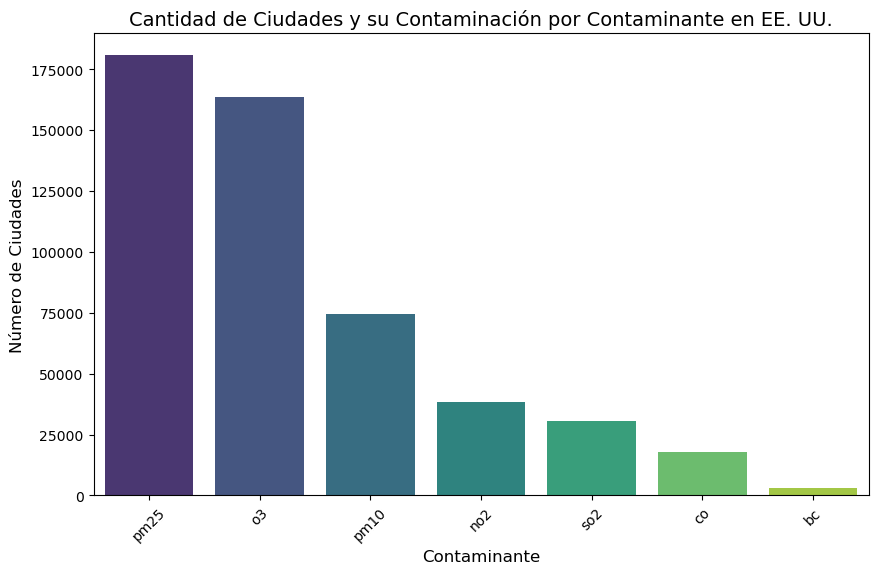

In [15]:
# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='pollutant', y='count', data=df_pollutant_city_count, palette='viridis')

# Títulos y etiquetas
plt.title('Cantidad de Ciudades y su Contaminación por Contaminante en EE. UU.', fontsize=14)
plt.xlabel('Contaminante', fontsize=12)
plt.ylabel('Número de Ciudades', fontsize=12)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [17]:
query = """
    SELECT 
      city, 
      latitude, 
      longitude, 
      pollutant, 
      AVG(value) AS avg_value,  -- Promedio de los valores para cada contaminante en cada ciudad
      COUNT(*) AS count,  -- Número de registros para cada contaminante en cada ciudad
      EXTRACT(DATE FROM timestamp) AS date  -- Extraer solo la fecha del timestamp para análisis temporal
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'
    GROUP BY 
      city, latitude, longitude, pollutant, date  -- Agrupar también por fecha
    ORDER BY 
      count DESC
    LIMIT 1000
"""
df_cities_pollutants = client.query(query).to_dataframe()

# Mostrar las primeras filas para verificar los resultados
print(df_cities_pollutants.head())


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                               city  latitude  longitude pollutant  avg_value  \
0                         CA8 - ARB       1.0  38.560748      pm25   2.337143   
1                         CA8 - ARB       1.0  38.560748      pm25   2.516000   
2  Riverside-San Bernardino-Ontario       1.0  34.103660        co   0.166250   
3     Milwaukee-Waukesha-West Allis       1.0  43.498100        bc   0.097083   
4                           Salinas       1.0  36.694261        co   0.204167   

   count        date  
0     35  2022-05-10  
1     25  2022-05-09  
2     24  2022-05-09  
3     24  2022-05-07  
4     24  2022-05-05  


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


                            city  latitude  longitude pollutant  avg_value  \
0                      CA8 - ARB       1.0  38.560748      pm25   2.337143   
1                      CA8 - ARB       1.0  38.560748      pm25   2.516000   
2  Milwaukee-Waukesha-West Allis       1.0  42.932570        bc   0.441250   
3        Seattle-Tacoma-Bellevue       1.0  47.597222        bc   0.425000   
4        Seattle-Tacoma-Bellevue       1.0  47.597222        bc   1.383333   

   count        date  
0     35  2022-05-10  
1     25  2022-05-09  
2     24  2022-05-07  
3     24  2022-05-08  
4     24  2022-05-05  


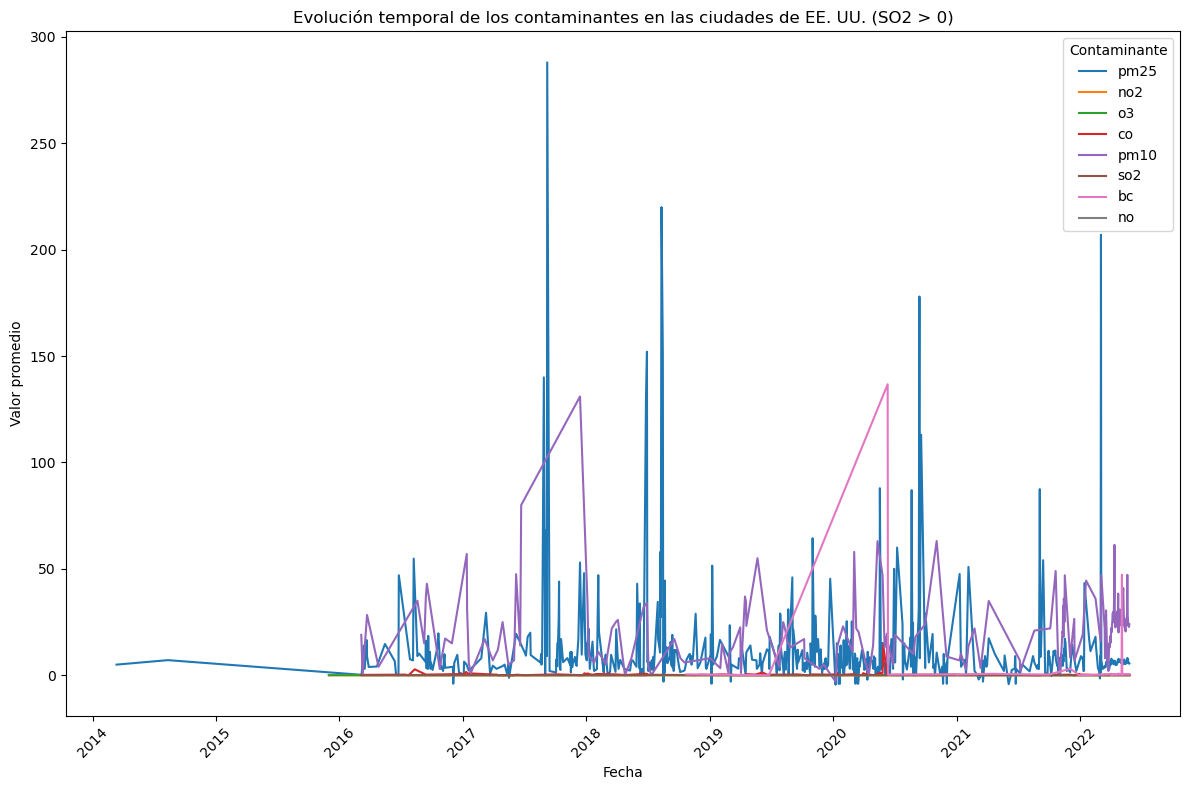

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Consulta SQL para obtener todos los contaminantes sin filtro
query = """
    SELECT 
      city, 
      latitude, 
      longitude, 
      pollutant, 
      AVG(value) AS avg_value, 
      COUNT(*) AS count,  
      EXTRACT(DATE FROM timestamp) AS date  -- Convertir 'timestamp' a 'date'
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'
    GROUP BY 
      city, latitude, longitude, pollutant, date  -- Agrupar por 'date'
    ORDER BY 
      count DESC
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants = client.query(query).to_dataframe()

# Mostrar las primeras filas para verificar los resultados
print(df_cities_pollutants.head())

# Convertir la columna 'date' a formato de fecha
df_cities_pollutants['date'] = pd.to_datetime(df_cities_pollutants['date'])

# Filtrar los valores de SO2 mayores a 0
df_cities_pollutants = df_cities_pollutants[(df_cities_pollutants['pollutant'] != 'so2') | (df_cities_pollutants['avg_value'] > 0)]

# Agrupar los datos por contaminante y fecha
df_pollutants_time_series = df_cities_pollutants.groupby(['date', 'pollutant'])['avg_value'].mean().reset_index()

# Graficar las series temporales de los diferentes contaminantes
plt.figure(figsize=(12, 8))

# Usar un ciclo para graficar cada contaminante en una línea
sns.lineplot(data=df_pollutants_time_series, x='date', y='avg_value', hue='pollutant')

# Mejorar el gráfico
plt.title('Evolución temporal de los contaminantes en las ciudades de EE. UU. (SO2 > 0)')
plt.xlabel('Fecha')
plt.ylabel('Valor promedio')
plt.xticks(rotation=45)
plt.legend(title='Contaminante')
plt.tight_layout()
plt.show()


In [19]:
# Verificar qué contaminantes están presentes en los datos
print(df_cities_pollutants['pollutant'].unique())


['pm25' 'bc' 'co' 'o3' 'no2' 'so2' 'pm10' 'no']


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2021:
pollutant     co     no2        o3       pm10        pm25    so2
city                                                            
BERNALILLO   NaN     NaN       NaN  21.000000         NaN    NaN
Birmingham   NaN     NaN       NaN        NaN   15.400000    NaN
CA8 - ARB    NaN     NaN       NaN        NaN   27.112500    NaN
Charleston   NaN     NaN       NaN        NaN    9.800000    NaN
College St   NaN     NaN       NaN        NaN    9.000000    NaN
DEL NORTE    NaN     NaN       NaN        NaN    8.000000    NaN
El Paso      NaN     NaN  0.018909  29.055556    7.536842    NaN
KERN         NaN  0.0205  0.042000        NaN   47.600000    NaN
MADISON      NaN     NaN       NaN        NaN  150.800000    NaN
MINNEHAHA    NaN     NaN  0.039000  13.700000   50.900000    NaN
MONTGOMERY   NaN     NaN       NaN  15.000000         NaN    NaN
Milwaukee-   NaN  0.0140  0.032000  34.900000   17.400000  0.002
New Orlea

<Figure size 1400x800 with 0 Axes>

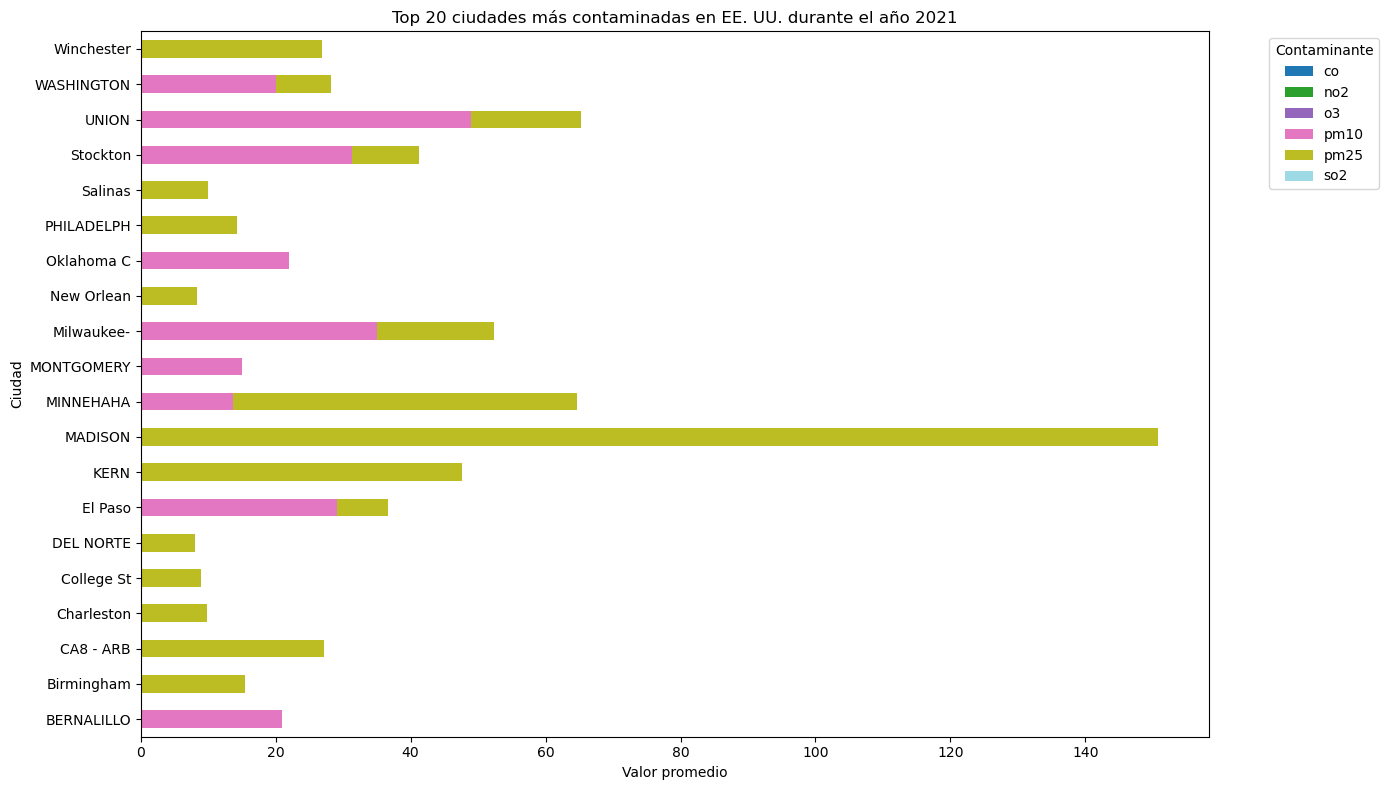

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta para obtener los datos
query = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2021  -- Filtrar solo el año 2021
    GROUP BY 
      city, pollutant
    ORDER BY 
      city, pollutant
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2021 = client.query(query).to_dataframe()

# Truncar los nombres de las ciudades a los primeros 10 caracteres
df_cities_pollutants_2021['city'] = df_cities_pollutants_2021['city'].str.slice(0, 10)

# Filtrar las 20 ciudades con el mayor promedio de contaminación (en cualquier contaminante)
top_cities = df_cities_pollutants_2021.groupby('city')['avg_value'].mean().nlargest(20).index
df_top_cities = df_cities_pollutants_2021[df_cities_pollutants_2021['city'].isin(top_cities)]

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot = df_top_cities.pivot(index='city', columns='pollutant', values='avg_value')

# Imprimir el valor de cada contaminante en cada ciudad de las 20 más contaminadas
print("Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2021:")
print(df_pivot)

# Graficar los datos con barras horizontales apiladas
plt.figure(figsize=(14, 8))

# Usamos un gráfico de barras horizontales apiladas
df_pivot.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')

# Mejorar el gráfico
plt.title('Top 20 ciudades más contaminadas en EE. UU. durante el año 2021')
plt.xlabel('Valor promedio')
plt.ylabel('Ciudad')
plt.legend(title='Contaminante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Valores promedio de pm25 y pm10 para las 5 ciudades más contaminadas en 2019-2022:
            city pollutant  year   avg_value
216      BANNOCK      pm10  2020   20.000000
217      BANNOCK      pm10  2022   14.678571
218      BANNOCK      pm25  2019   95.300000
1137         FRA      pm25  2020   91.571429
1959     MADISON      pm25  2020    6.400000
1960     MADISON      pm25  2021  150.800000
1961     MADISON      pm25  2022    5.139193
2287    Muskogee      pm10  2019   55.000000
2583  POWDER RIV      pm10  2020  132.000000
2584  POWDER RIV      pm10  2022   12.453280
2585  POWDER RIV      pm25  2020   40.700000
2586  POWDER RIV      pm25  2022    4.031200


C:\Users\crist\AppData\Local\Temp\ipykernel_28148\1471230599.py:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Contaminante')


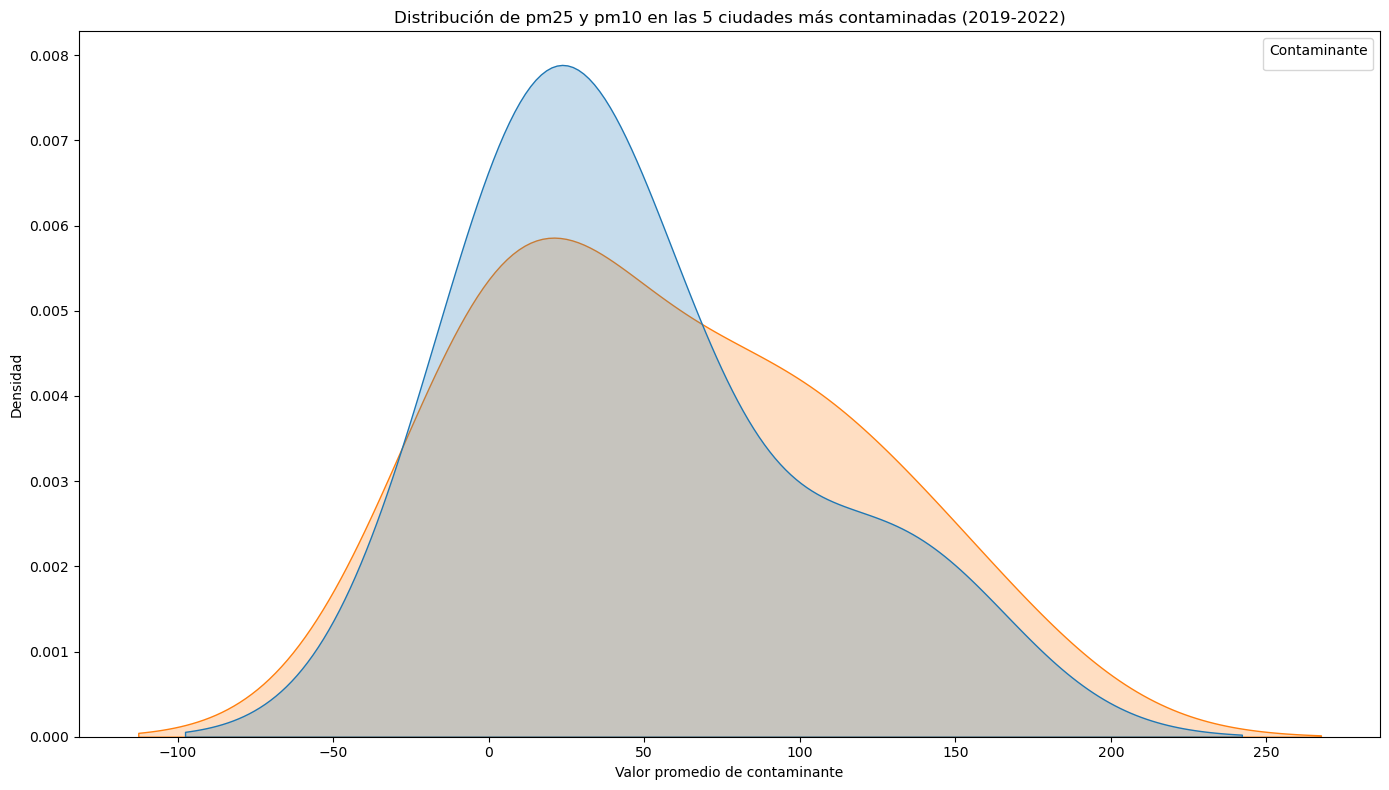

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Inicializar cliente de BigQuery
client = bigquery.Client()

# Consulta SQL para obtener los datos de contaminación en 2019-2022
query = """
    SELECT 
      city, 
      pollutant, 
      EXTRACT(YEAR FROM timestamp) AS year, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) BETWEEN 2019 AND 2022  -- Filtrar años específicos
    GROUP BY 
      city, pollutant, year
    ORDER BY 
      city, pollutant, year
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants = client.query(query).to_dataframe()

# Truncar los nombres de las ciudades a los primeros 10 caracteres para mejorar la visualización
df_cities_pollutants['city'] = df_cities_pollutants['city'].str.slice(0, 10)

# Filtrar solo los contaminantes pm25 y pm10
df_pm25_pm10 = df_cities_pollutants[df_cities_pollutants['pollutant'].isin(['pm25', 'pm10'])]

# Seleccionar las 5 ciudades con mayor contaminación en el periodo 2019-2022
top_5_cities = df_pm25_pm10.groupby('city')['avg_value'].mean().nlargest(5).index
df_top_5_cities = df_pm25_pm10[df_pm25_pm10['city'].isin(top_5_cities)]

# Imprimir los resultados de las 5 ciudades más contaminadas con pm25 y pm10
print("Valores promedio de pm25 y pm10 para las 5 ciudades más contaminadas en 2019-2022:")
print(df_top_5_cities)

# Graficar la distribución de los valores promedio de pm25 y pm10 en las 5 ciudades más contaminadas
plt.figure(figsize=(14, 8))

# Gráfico de densidad con diferentes colores para pm25 y pm10
sns.kdeplot(data=df_top_5_cities, x='avg_value', hue='pollutant', fill=True, common_norm=False, palette='tab10')

# Mejorar el gráfico
plt.title('Distribución de pm25 y pm10 en las 5 ciudades más contaminadas (2019-2022)')
plt.xlabel('Valor promedio de contaminante')
plt.ylabel('Densidad')
plt.legend(title='Contaminante')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



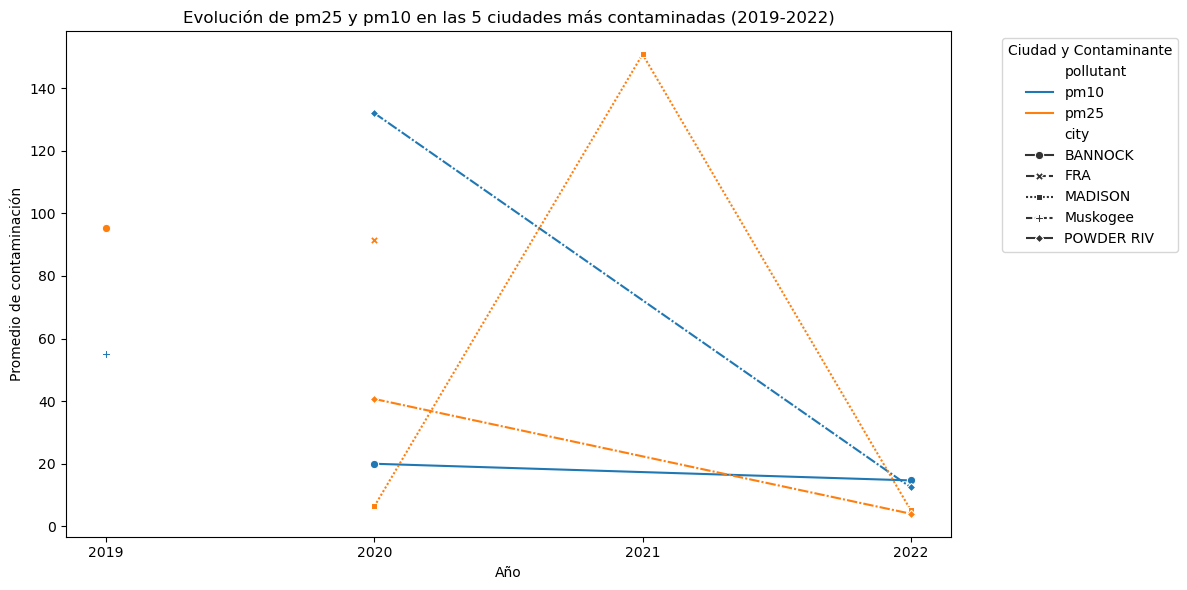

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_5_cities, x="year", y="avg_value", hue="pollutant", style="city", markers=True)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Evolución de pm25 y pm10 en las 5 ciudades más contaminadas (2019-2022)")
plt.xlabel("Año")
plt.ylabel("Promedio de contaminación")
plt.legend(title="Ciudad y Contaminante", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Primeras filas del DataFrame:
        city pollutant  avg_value
0        037      pm25      7.000
1        051      pm25      1.750
2     AMADOR        o3      0.027
3  ANCHORAGE      pm10     25.000
4  ANCHORAGE      pm25      4.000
Ciudades únicas en los datos:
['037' '051' 'AMADOR' 'ANCHORAGE' 'AVERY' 'Anchorage' 'Asheville'
 'Augusta-Waterville' 'BANNOCK' 'BAYAMON' 'BOUNDARY' 'BUTTE' 'Bakersfield'
 'Bangor' 'Beaumont-Port Arthur' 'Birmingham-Hoover' 'Bishop'
 'Bridgeport-Stamford-Norwalk' 'Brigham City' 'CA8 - ARB' 'CABELL'
 'CALAVERAS' 'CAMERON' 'CARBON' 'CASWELL' 'CLACKAMAS' 'CLARK' 'COLUSA'
 'CUSTER' 'Canton-Massillon' 'Cedar Rapids' 'Charleston-North Charleston'
 'Charlotte-Gastonia-Concord' 'Clarksville' 'Cleveland-Elyria-Mentor'
 "Coeur d'Alene" 'Columbus' 'Dallas-Fort Worth-Arlington'
 'Davenport-Moline-Rock Island' 'Dayton' 'Denver-Aurora'
 'Detroit-Warren-Livonia' 'Durham' 'El Centro' 'El Dorado' 'Evansville'
 'FS1 - Forest Service' 'Fayetteville' 'Florence-Muscle Shoals' 

<Figure size 1400x800 with 0 Axes>

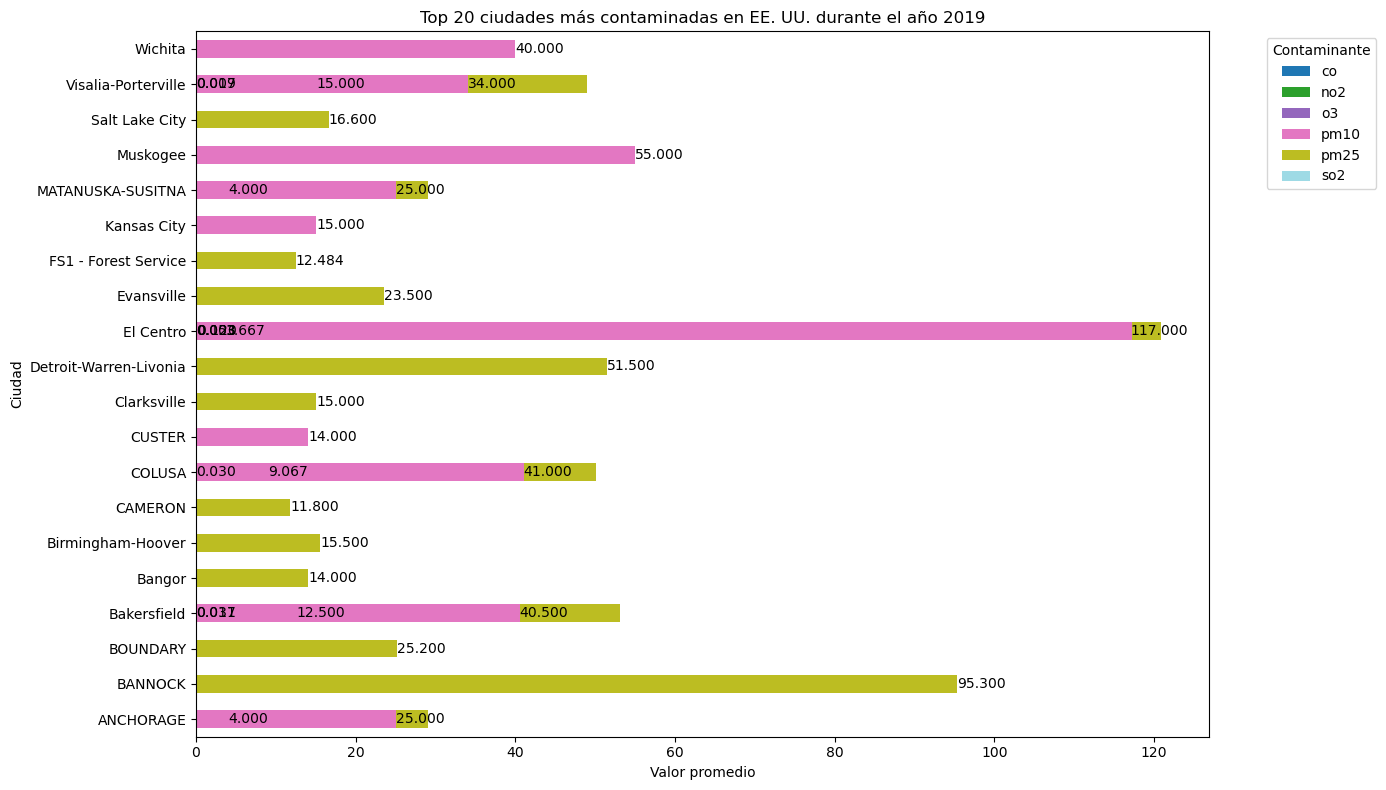

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta para obtener los datos del año 2019
query = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US'  -- Filtrar solo por el país 'US'
      AND EXTRACT(YEAR FROM timestamp) = 2019  -- Filtrar solo el año 2019
    GROUP BY 
      city, pollutant
    ORDER BY 
      city, pollutant
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2019 = client.query(query).to_dataframe()

# Verificar las primeras filas para inspección
print("Primeras filas del DataFrame:")
print(df_cities_pollutants_2019.head())

# Verificar si hay nombres de ciudades inusuales o con abreviaturas
print("Ciudades únicas en los datos:")
print(df_cities_pollutants_2019['city'].unique())

# Filtrar las 20 ciudades con el mayor promedio de contaminación (en cualquier contaminante)
top_cities = df_cities_pollutants_2019.groupby('city')['avg_value'].mean().nlargest(20).index
df_top_cities = df_cities_pollutants_2019[df_cities_pollutants_2019['city'].isin(top_cities)]

# Agrupar por ciudad y contaminante para asegurarse de no tener duplicados
df_grouped = df_top_cities.groupby(['city', 'pollutant'], as_index=False)['avg_value'].mean()

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot = df_grouped.pivot(index='city', columns='pollutant', values='avg_value')

# Imprimir el valor de cada contaminante en cada ciudad de las 20 más contaminadas
print("Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2019:")
print(df_pivot)

# Graficar los datos con barras horizontales apiladas
plt.figure(figsize=(14, 8))

# Usamos un gráfico de barras horizontales apiladas
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')

# Agregar etiquetas en cada barra
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Solo agregar etiquetas a las barras con valor mayor a 0
        ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f'{width:.3f}', 
                va='center', ha='left', fontsize=10, color='black')

# Mejorar el gráfico
plt.title('Top 20 ciudades más contaminadas en EE. UU. durante el año 2019')
plt.xlabel('Valor promedio')
plt.ylabel('Ciudad')
plt.legend(title='Contaminante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2022:
pollutant         o3        pm10       pm25
city                                       
CATANO           NaN   62.640000   7.524928
Deming           NaN   38.141053        NaN
Dodge City       NaN   27.192797        NaN
ELKO             NaN   21.869767        NaN
Lake Havas       NaN   29.033264        NaN
MONO             NaN  104.785446   5.608058
N/A         0.043755   70.948276   6.894607
NYE              NaN   34.759447        NaN
Nogales          NaN   38.216049   8.145791
PIMA             NaN   39.627835   7.385081
PINAL       0.041818   55.810700  10.459119
PONCE            NaN   95.000000        NaN
PUTNAM           NaN   26.229167        NaN
Payson           NaN   34.031926        NaN
RIVERSIDE   0.054247   54.035971        NaN
SAN LUIS O       NaN   53.172043  14.962366
SHERMAN          NaN   30.156652        NaN
SONORA      0.044258   51.455487   9.257992
ST. LOUIS        NaN   42.124413   8.04

<Figure size 1400x800 with 0 Axes>

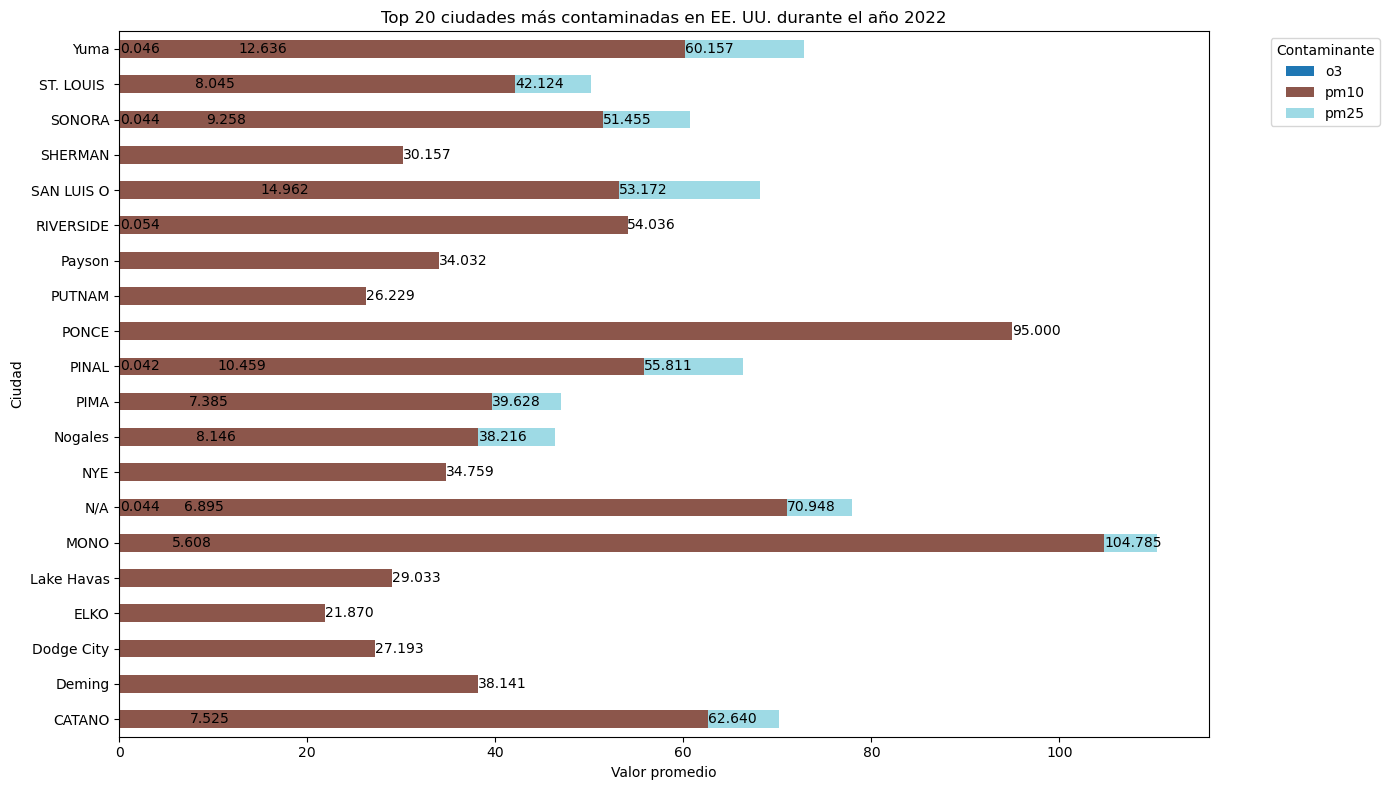

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta para obtener los datos del año 2022
query = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2022  -- Filtrar solo el año 2022
    GROUP BY 
      city, pollutant
    ORDER BY 
      city, pollutant
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2022 = client.query(query).to_dataframe()

# Truncar los nombres de las ciudades a los primeros 10 caracteres
df_cities_pollutants_2022['city'] = df_cities_pollutants_2022['city'].str.slice(0, 10)

# Filtrar las 20 ciudades con el mayor promedio de contaminación (en cualquier contaminante)
top_cities = df_cities_pollutants_2022.groupby('city')['avg_value'].mean().nlargest(20).index
df_top_cities = df_cities_pollutants_2022[df_cities_pollutants_2022['city'].isin(top_cities)]

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot = df_top_cities.pivot(index='city', columns='pollutant', values='avg_value')

# Imprimir el valor de cada contaminante en cada ciudad de las 20 más contaminadas
print("Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2022:")
print(df_pivot)

# Graficar los datos con barras horizontales apiladas
plt.figure(figsize=(14, 8))

# Usamos un gráfico de barras horizontales apiladas
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')

# Agregar etiquetas en cada barra
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Solo agregar etiquetas a las barras con valor mayor a 0
        ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f'{width:.3f}', 
                va='center', ha='left', fontsize=10, color='black')

# Mejorar el gráfico
plt.title('Top 20 ciudades más contaminadas en EE. UU. durante el año 2022')
plt.xlabel('Valor promedio')
plt.ylabel('Ciudad')
plt.legend(title='Contaminante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2020:
pollutant        bc        co        no2         o3   pm10       pm25  so2
city                                                                      
037             NaN       NaN        NaN        NaN    NaN  22.000000  NaN
Ann Arbor       NaN       NaN        NaN   0.040500    NaN  33.300000  NaN
BANNOCK         NaN       NaN        NaN        NaN   20.0        NaN  NaN
BETHEL          NaN       NaN        NaN        NaN   37.0  26.000000  NaN
BROWN           NaN       NaN  14.000000  32.520000   10.0   5.000000  NaN
Buffalo-Ni      NaN       NaN        NaN   0.037000   31.0  12.400000  NaN
FRA             NaN       NaN        NaN        NaN    NaN  91.571429  NaN
HENNEPIN        NaN       NaN        NaN        NaN   22.0        NaN  NaN
Madera          NaN       NaN        NaN   0.063500   34.0   9.000000  NaN
PINAL           NaN       NaN        NaN   0.064000   34.0   9.000000  NaN
POWDER RIV      NaN

<Figure size 1400x800 with 0 Axes>

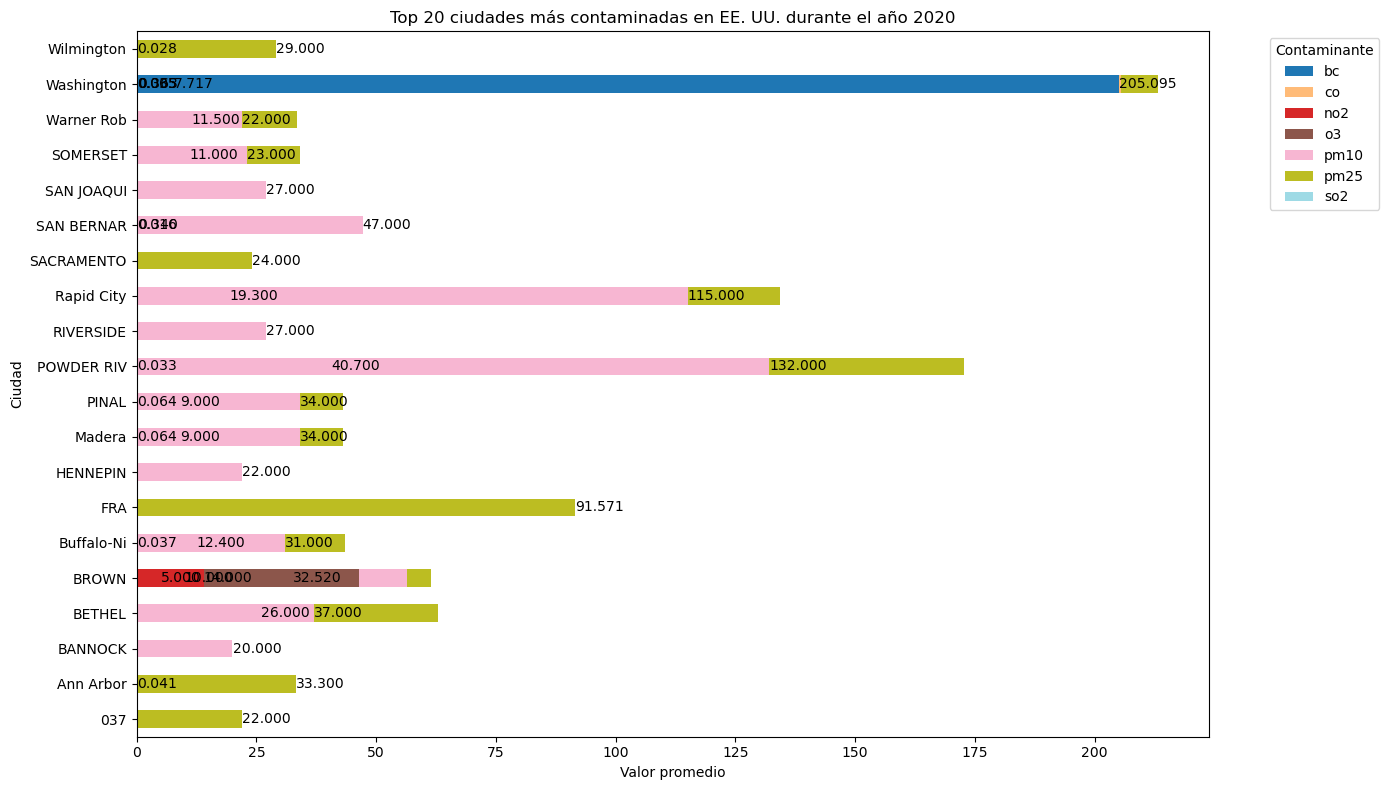

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta para obtener los datos del año 2020
query = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2020  -- Filtrar solo el año 2020
    GROUP BY 
      city, pollutant
    ORDER BY 
      city, pollutant
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2020 = client.query(query).to_dataframe()

# Truncar los nombres de las ciudades a los primeros 10 caracteres
df_cities_pollutants_2020['city'] = df_cities_pollutants_2020['city'].str.slice(0, 10)

# Filtrar las 20 ciudades con el mayor promedio de contaminación (en cualquier contaminante)
top_cities = df_cities_pollutants_2020.groupby('city')['avg_value'].mean().nlargest(20).index
df_top_cities = df_cities_pollutants_2020[df_cities_pollutants_2020['city'].isin(top_cities)]

# Agrupar por ciudad y contaminante para asegurarse de no tener duplicados
df_grouped = df_top_cities.groupby(['city', 'pollutant'], as_index=False)['avg_value'].mean()

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot = df_grouped.pivot(index='city', columns='pollutant', values='avg_value')

# Imprimir el valor de cada contaminante en cada ciudad de las 20 más contaminadas
print("Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2020:")
print(df_pivot)

# Graficar los datos con barras horizontales apiladas
plt.figure(figsize=(14, 8))

# Usamos un gráfico de barras horizontales apiladas
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')

# Agregar etiquetas en cada barra
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Solo agregar etiquetas a las barras con valor mayor a 0
        ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f'{width:.3f}', 
                va='center', ha='left', fontsize=10, color='black')

# Mejorar el gráfico
plt.title('Top 20 ciudades más contaminadas en EE. UU. durante el año 2020')
plt.xlabel('Valor promedio')
plt.ylabel('Ciudad')
plt.legend(title='Contaminante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2019:
pollutant                 co       no2     o3   pm10       pm25  so2
city                                                                
ANCHORAGE                NaN       NaN    NaN   25.0   4.000000  NaN
BANNOCK                  NaN       NaN    NaN    NaN  95.300000  NaN
BOUNDARY                 NaN       NaN    NaN    NaN  25.200000  NaN
Bakersfield              NaN  0.010667  0.037   40.5  12.500000  NaN
Bangor                   NaN       NaN    NaN    NaN  14.000000  NaN
Birmingham-Hoover        NaN       NaN    NaN    NaN  15.500000  NaN
CAMERON                  NaN       NaN    NaN    NaN  11.800000  NaN
COLUSA                   NaN       NaN  0.030   41.0   9.066667  NaN
CUSTER                   NaN       NaN    NaN   14.0        NaN  NaN
Clarksville              NaN       NaN    NaN    NaN  15.000000  NaN
Detroit-Warren-Livonia   NaN       NaN    NaN    NaN  51.500000  NaN
El Centro             

<Figure size 1400x800 with 0 Axes>

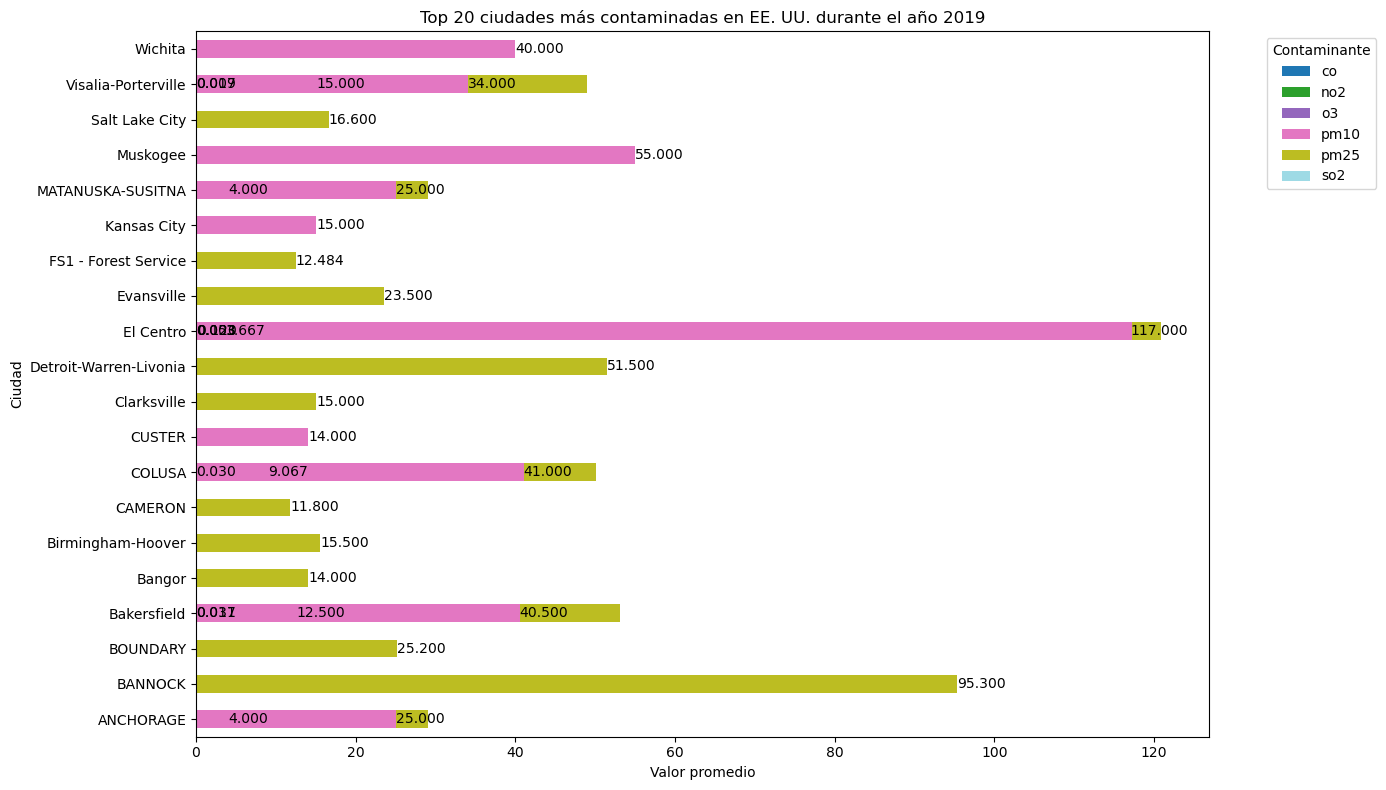

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Consulta para obtener los datos del año 2019
query = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2019  -- Filtrar solo el año 2019
    GROUP BY 
      city, pollutant
    ORDER BY 
      city, pollutant
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2019 = client.query(query).to_dataframe()

# **Eliminar esta línea para no truncar los nombres de las ciudades**
# df_cities_pollutants_2019['city'] = df_cities_pollutants_2019['city'].str.slice(0, 10)

# Filtrar las 20 ciudades con el mayor promedio de contaminación (en cualquier contaminante)
top_cities = df_cities_pollutants_2019.groupby('city')['avg_value'].mean().nlargest(20).index
df_top_cities = df_cities_pollutants_2019[df_cities_pollutants_2019['city'].isin(top_cities)]

# Agrupar por ciudad y contaminante para asegurarse de no tener duplicados
df_grouped = df_top_cities.groupby(['city', 'pollutant'], as_index=False)['avg_value'].mean()

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot = df_grouped.pivot(index='city', columns='pollutant', values='avg_value')

# Imprimir el valor de cada contaminante en cada ciudad de las 20 más contaminadas
print("Valores promedio de contaminantes para las 20 ciudades más contaminadas en 2019:")
print(df_pivot)

# Graficar los datos con barras horizontales apiladas
plt.figure(figsize=(14, 8))

# Usamos un gráfico de barras horizontales apiladas
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')

# Agregar etiquetas en cada barra
for p in ax.patches:
    width = p.get_width()
    if width > 0:  # Solo agregar etiquetas a las barras con valor mayor a 0
        ax.text(p.get_width() + 0.02, p.get_y() + p.get_height() / 2, f'{width:.3f}', 
                va='center', ha='left', fontsize=10, color='black')

# Mejorar el gráfico
plt.title('Top 20 ciudades más contaminadas en EE. UU. durante el año 2019')
plt.xlabel('Valor promedio')
plt.ylabel('Ciudad')
plt.legend(title='Contaminante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()


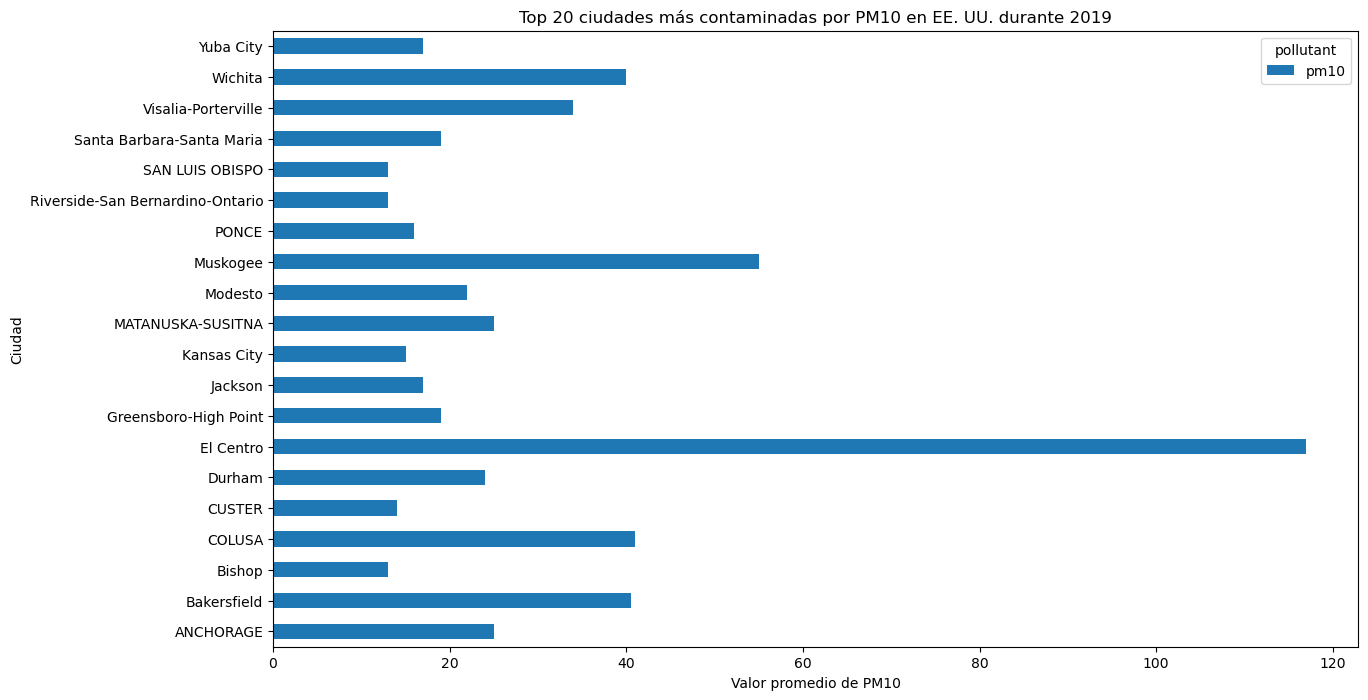

In [32]:
df_pm10 = df_cities_pollutants_2019[df_cities_pollutants_2019['pollutant'] == 'pm10']
top_cities_pm10 = df_pm10.groupby('city')['avg_value'].mean().nlargest(20).index
df_top_cities_pm10 = df_pm10[df_pm10['city'].isin(top_cities_pm10)]

# Graficar solo el contaminante PM10
df_pivot_pm10 = df_top_cities_pm10.pivot(index='city', columns='pollutant', values='avg_value')
df_pivot_pm10.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Top 20 ciudades más contaminadas por PM10 en EE. UU. durante 2019')
plt.xlabel('Valor promedio de PM10')
plt.ylabel('Ciudad')
plt.show()


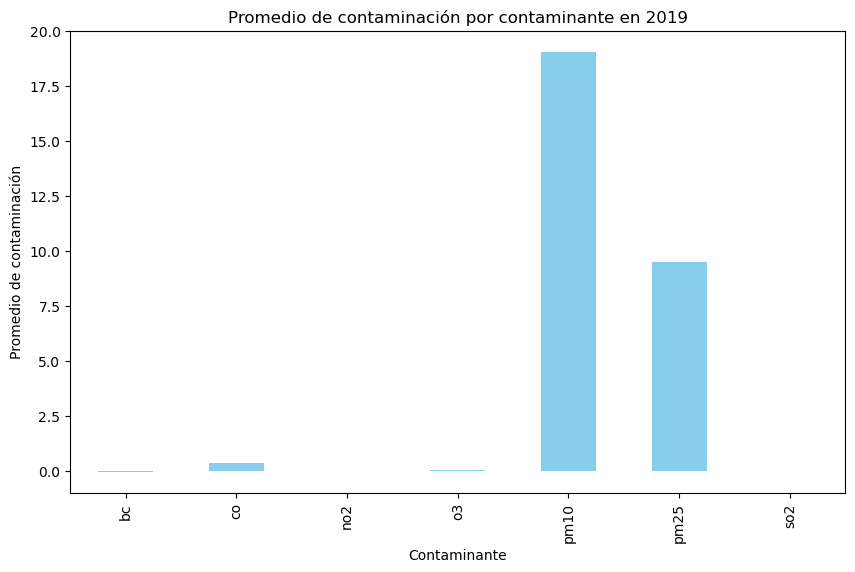

In [33]:
df_pollutants_avg = df_cities_pollutants_2019.groupby('pollutant')['avg_value'].mean()
df_pollutants_avg.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Promedio de contaminación por contaminante en 2019')
plt.xlabel('Contaminante')
plt.ylabel('Promedio de contaminación')
plt.show()


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


<Figure size 1400x800 with 0 Axes>

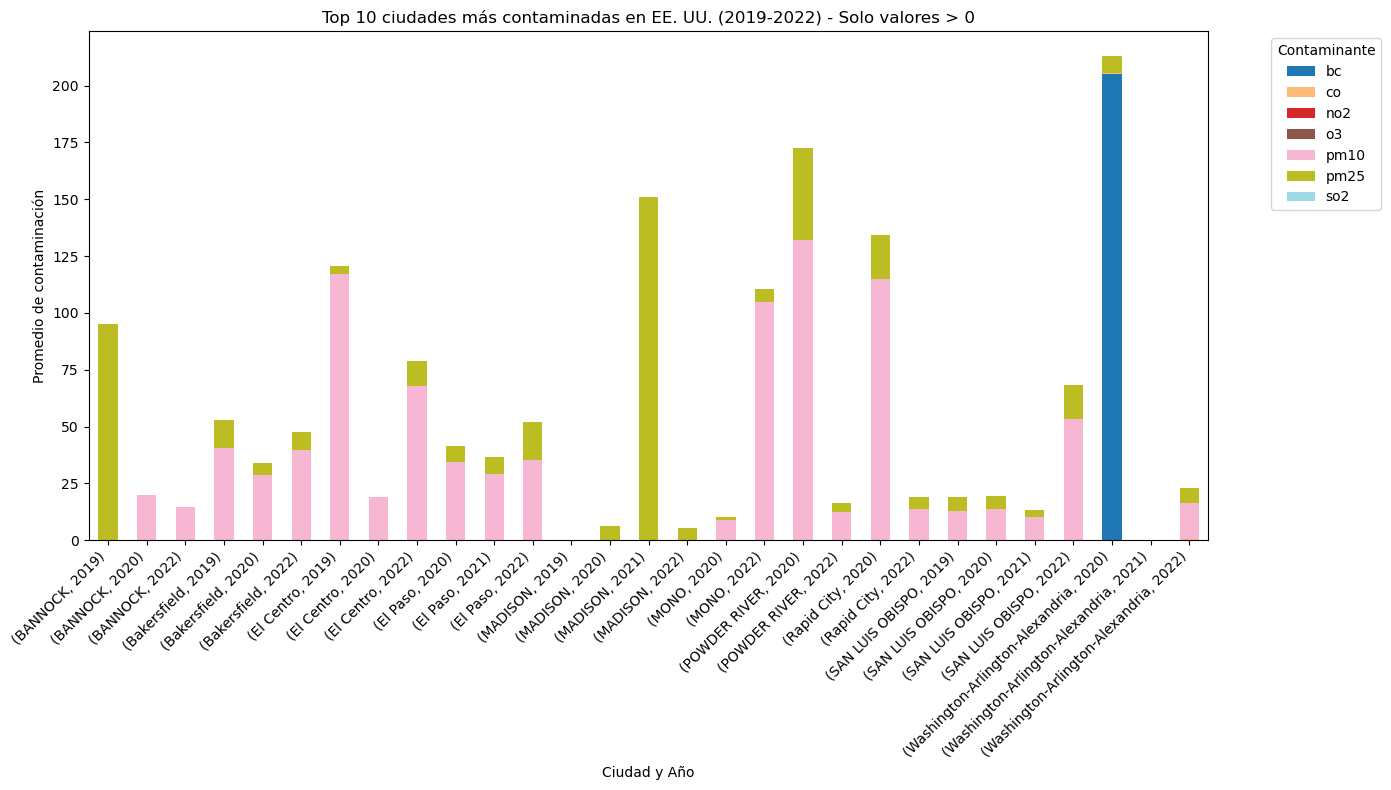

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Inicializar cliente de BigQuery
client = bigquery.Client()

# Consulta SQL para obtener los datos de contaminación en 2019-2022
query_years = """
    SELECT 
      city, 
      pollutant, 
      EXTRACT(YEAR FROM timestamp) AS year, 
      AVG(value) AS avg_value
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) IN (2019, 2020, 2021, 2022)  -- Filtrar años específicos
    GROUP BY 
      city, pollutant, year
    ORDER BY 
      city, pollutant, year
"""

# Ejecutar la consulta y obtener los datos en un DataFrame
df_years_pollutants = client.query(query_years).to_dataframe()

# Filtrar valores mayores a 0
df_years_pollutants = df_years_pollutants[df_years_pollutants['avg_value'] > 0]

# Seleccionar solo las 10 ciudades con más contaminación total en el período
top_cities = df_years_pollutants.groupby("city")["avg_value"].sum().nlargest(10).index
df_filtered = df_years_pollutants[df_years_pollutants["city"].isin(top_cities)]

# Pivotar los datos por ciudad, año y contaminante
df_pivot_years = df_filtered.pivot_table(index=['city', 'year'], columns='pollutant', values='avg_value')

# Graficar los contaminantes por ciudad y año (valores mayores a 0)
plt.figure(figsize=(14, 8))
ax = df_pivot_years.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')

# Rotar las etiquetas en el eje X
plt.xticks(rotation=45, ha='right')

# Mejoras en el diseño
plt.title('Top 10 ciudades más contaminadas en EE. UU. (2019-2022) - Solo valores > 0')
plt.xlabel('Ciudad y Año')
plt.ylabel('Promedio de contaminación')
plt.legend(title="Contaminante", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Mostrar el gráfico
plt.show()



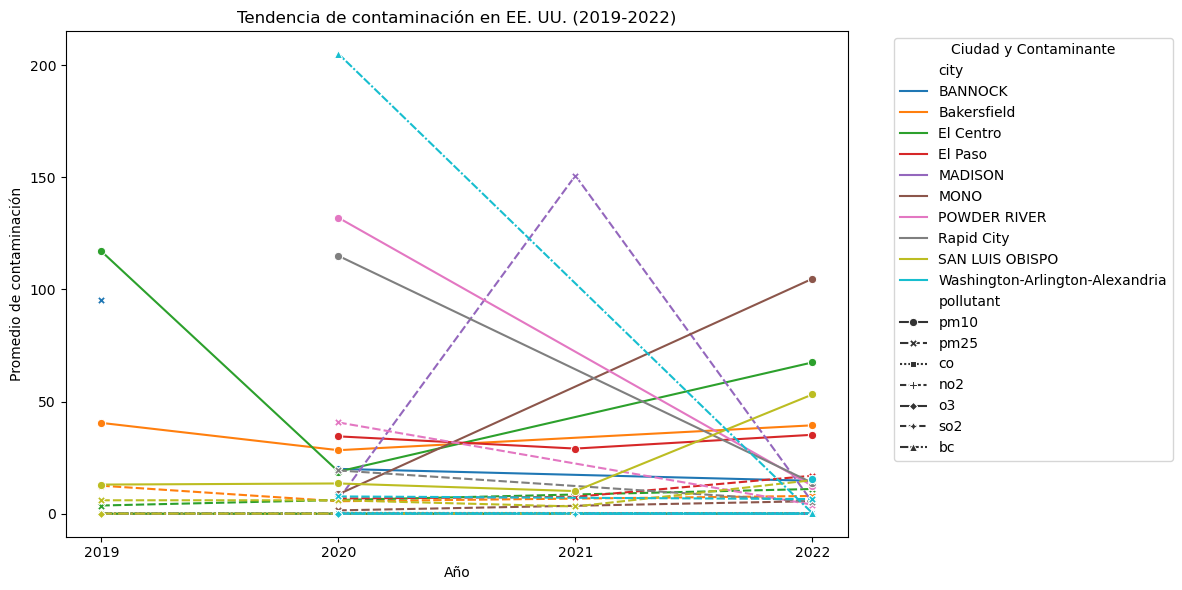

In [49]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="year", y="avg_value", hue="city", style="pollutant", markers=True)
plt.xticks([2019, 2020, 2021, 2022])
plt.title("Tendencia de contaminación en EE. UU. (2019-2022)")
plt.xlabel("Año")
plt.ylabel("Promedio de contaminación")
plt.legend(title="Ciudad y Contaminante", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [36]:
# Consulta para obtener las ciudades más contaminadas en EE. UU. en 2021
query_us = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2021
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC
    LIMIT 1  -- Limitar a la ciudad más contaminada
"""

# Ejecutar la consulta para EE. UU.
df_us = client.query(query_us).to_dataframe()

# Consulta para obtener las ciudades más contaminadas en China en 2021
query_cn = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'CN' 
      AND EXTRACT(YEAR FROM timestamp) = 2021
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC
    LIMIT 1  -- Limitar a la ciudad más contaminada
"""

# Ejecutar la consulta para China
df_cn = client.query(query_cn).to_dataframe()


In [37]:
# Mostrar la ciudad más contaminada de EE. UU. y China en 2021
print("Ciudad más contaminada en EE. UU. en 2021:")
print(df_us)

print("\nCiudad más contaminada en China en 2021:")
print(df_cn)


Ciudad más contaminada en EE. UU. en 2021:
      city pollutant  avg_value
0  MADISON      pm25      150.8

Ciudad más contaminada en China en 2021:
  city pollutant  avg_value
0  萍乡市        co     1580.0


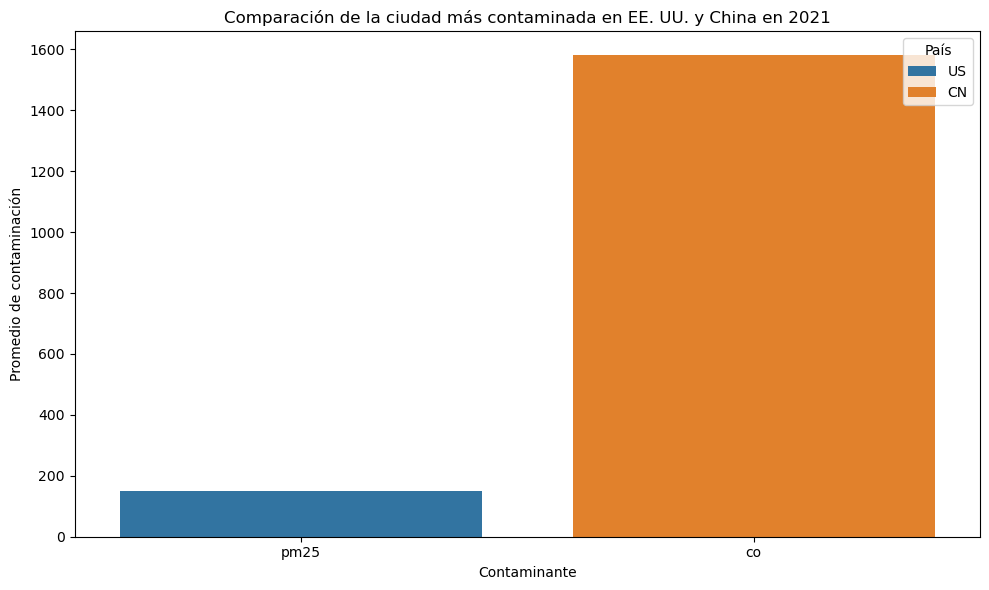

In [38]:
# Unir los resultados de ambas ciudades en un solo DataFrame para comparación
df_comparison = pd.concat([df_us, df_cn], keys=['US', 'CN'])

# Graficar los contaminantes de ambas ciudades
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comparison, x='pollutant', y='avg_value', hue=df_comparison.index.get_level_values(0))
plt.title('Comparación de la ciudad más contaminada en EE. UU. y China en 2021')
plt.xlabel('Contaminante')
plt.ylabel('Promedio de contaminación')
plt.legend(title='País', loc='upper right')
plt.tight_layout()
plt.show()


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Ciudad más contaminada en EE. UU. en 2019:
        city pollutant  avg_value
0  El Centro      pm10      117.0

Ciudad más contaminada en China en 2019:
  city pollutant  avg_value
0  大同市        co     2600.0


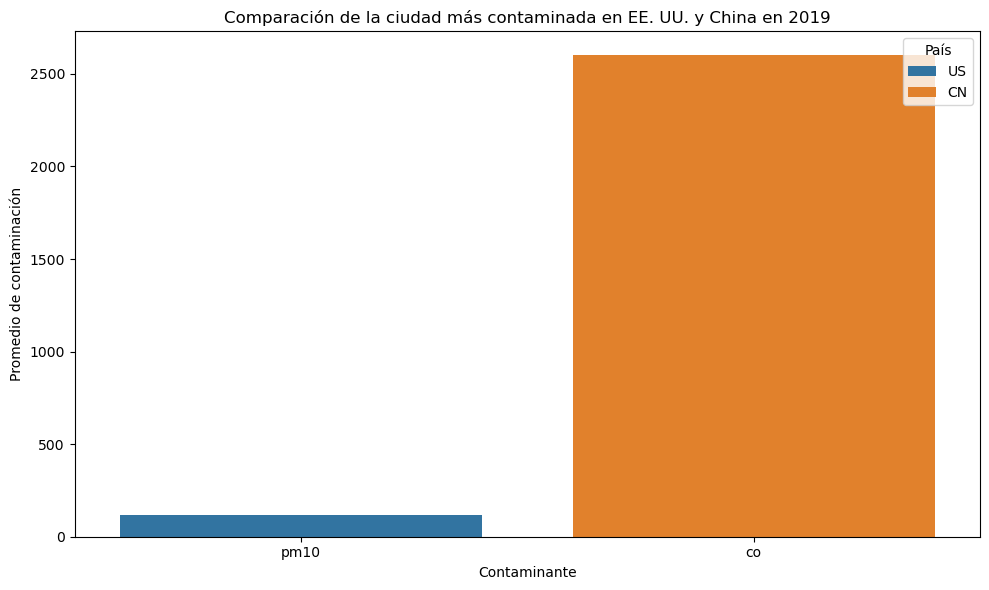

In [39]:
# Consulta para obtener la ciudad más contaminada en EE. UU. en 2019
query_us_2019 = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2019
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC
    LIMIT 1  -- Limitar a la ciudad más contaminada
"""

# Ejecutar la consulta para EE. UU. en 2019
df_us_2019 = client.query(query_us_2019).to_dataframe()

# Consulta para obtener la ciudad más contaminada en China en 2019
query_cn_2019 = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'CN' 
      AND EXTRACT(YEAR FROM timestamp) = 2019
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC
    LIMIT 1  -- Limitar a la ciudad más contaminada
"""

# Ejecutar la consulta para China en 2019
df_cn_2019 = client.query(query_cn_2019).to_dataframe()
# Mostrar la ciudad más contaminada de EE. UU. y China en 2019
print("Ciudad más contaminada en EE. UU. en 2019:")
print(df_us_2019)

print("\nCiudad más contaminada en China en 2019:")
print(df_cn_2019)
# Unir los resultados de ambas ciudades en un solo DataFrame para comparación
df_comparison_2019 = pd.concat([df_us_2019, df_cn_2019], keys=['US', 'CN'])

# Graficar los contaminantes de ambas ciudades en 2019
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comparison_2019, x='pollutant', y='avg_value', hue=df_comparison_2019.index.get_level_values(0))
plt.title('Comparación de la ciudad más contaminada en EE. UU. y China en 2019')
plt.xlabel('Contaminante')
plt.ylabel('Promedio de contaminación')
plt.legend(title='País', loc='upper right')
plt.tight_layout()
plt.show()


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


Ciudad más contaminada en EE. UU. en 2022:
   city pollutant   avg_value
0  MONO      pm10  104.785446

Ciudad más contaminada en China en 2022:
       city pollutant  avg_value
0  Shanghai      pm25  31.406667


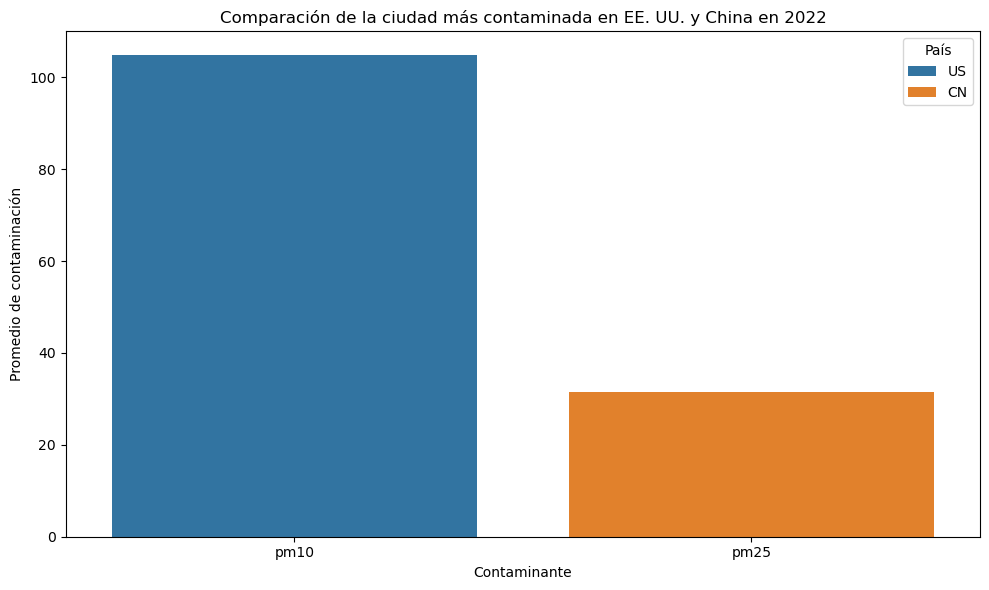

In [40]:
# Consulta para obtener la ciudad más contaminada en EE. UU. en 2022
query_us_2022 = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2022
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC
    LIMIT 1  -- Limitar a la ciudad más contaminada
"""

# Ejecutar la consulta para EE. UU. en 2022
df_us_2022 = client.query(query_us_2022).to_dataframe()

# Consulta para obtener la ciudad más contaminada en China en 2022
query_cn_2022 = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'CN' 
      AND EXTRACT(YEAR FROM timestamp) = 2022
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC
    LIMIT 1  -- Limitar a la ciudad más contaminada
"""

# Ejecutar la consulta para China en 2022
df_cn_2022 = client.query(query_cn_2022).to_dataframe()

# Mostrar la ciudad más contaminada de EE. UU. y China en 2022
print("Ciudad más contaminada en EE. UU. en 2022:")
print(df_us_2022)

print("\nCiudad más contaminada en China en 2022:")
print(df_cn_2022)
# Unir los resultados de ambas ciudades en un solo DataFrame para comparación
df_comparison_2022 = pd.concat([df_us_2022, df_cn_2022], keys=['US', 'CN'])

# Graficar los contaminantes de ambas ciudades en 2022
plt.figure(figsize=(10, 6))
sns.barplot(data=df_comparison_2022, x='pollutant', y='avg_value', hue=df_comparison_2022.index.get_level_values(0))
plt.title('Comparación de la ciudad más contaminada en EE. UU. y China en 2022')
plt.xlabel('Contaminante')
plt.ylabel('Promedio de contaminación')
plt.legend(title='País', loc='upper right')
plt.tight_layout()
plt.show()




c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


pollutant                      pm10      pm25
city                                         
BERNALILLO                     21.0       NaN
CA8 - ARB                       NaN   27.1125
KERN                            NaN   47.6000
MADISON                         NaN  150.8000
MINNEHAHA                      13.7   50.9000
Milwaukee-Waukesha-West Allis  34.9   17.4000
Oklahoma City                  22.0       NaN
Stockton                       31.0   10.0000
UNION                          49.0   16.3000
Winchester                      NaN   26.8000
Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas:
pollutant      pm10      pm25
pollutant                    
pm10       1.000000 -0.780793
pm25      -0.780793  1.000000


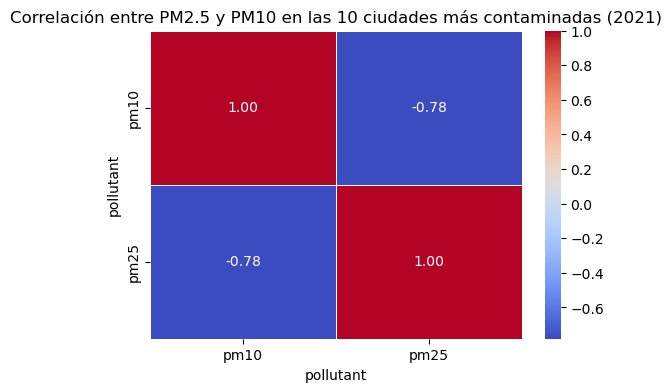

In [41]:
# Consulta para obtener los datos de PM2.5 y PM10 en 2021
query = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2021  -- Filtrar solo el año 2021
      AND pollutant IN ('pm25', 'pm10')  -- Filtrar solo PM2.5 y PM10
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC  -- Ordenar por el valor promedio (de mayor a menor)
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2021 = client.query(query).to_dataframe()

# Filtrar las 10 ciudades más contaminadas
top_10_cities_pm25_pm10 = df_cities_pollutants_2021.groupby('city')['avg_value'].mean().nlargest(10).index
df_top_10_cities = df_cities_pollutants_2021[df_cities_pollutants_2021['city'].isin(top_10_cities_pm25_pm10)]

# Agrupar por ciudad y contaminante
df_grouped = df_top_10_cities.groupby(['city', 'pollutant'], as_index=False)['avg_value'].mean()

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot = df_grouped.pivot(index='city', columns='pollutant', values='avg_value')

# Mostrar los primeros 10 resultados
print(df_pivot)
# Calcular la correlación entre PM2.5 y PM10
correlation = df_pivot.corr()

# Imprimir la matriz de correlación
print("Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas:")
print(correlation)

# Graficar la correlación con un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2021)')
plt.show()


In [42]:
# Consulta para obtener los datos de PM2.5 y PM10 en 2022
query_2022 = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2022  -- Filtrar solo el año 2022
      AND pollutant IN ('pm25', 'pm10')  -- Filtrar solo PM2.5 y PM10
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC  -- Ordenar por el valor promedio (de mayor a menor)
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2022 = client.query(query_2022).to_dataframe()

# Filtrar las 10 ciudades más contaminadas
top_10_cities_pm25_pm10_2022 = df_cities_pollutants_2022.groupby('city')['avg_value'].mean().nlargest(10).index
df_top_10_cities_2022 = df_cities_pollutants_2022[df_cities_pollutants_2022['city'].isin(top_10_cities_pm25_pm10_2022)]

# Agrupar por ciudad y contaminante
df_grouped_2022 = df_top_10_cities_2022.groupby(['city', 'pollutant'], as_index=False)['avg_value'].mean()

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot_2022 = df_grouped_2022.pivot(index='city', columns='pollutant', values='avg_value')

# Mostrar los primeros 10 resultados
print(df_pivot_2022)


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


pollutant                   pm10       pm25
city                                       
Deming                 38.141053        NaN
Durango                39.610619        NaN
El Centro              67.477599  11.027897
Farmington             43.867965        NaN
MONO                  104.785446   5.608058
N/A                    70.948276   6.894607
PONCE                  95.000000        NaN
RIVERSIDE              54.035971        NaN
Sierra Vista-Douglas   36.010944        NaN
Yuma                   60.157350  12.636175


Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2022):
pollutant      pm10      pm25
pollutant                    
pm10       1.000000 -0.817811
pm25      -0.817811  1.000000


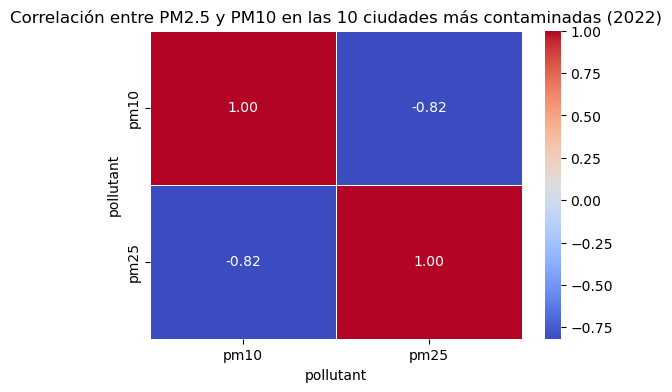

In [43]:
# Calcular la correlación entre PM2.5 y PM10
correlation_2022 = df_pivot_2022.corr()

# Imprimir la matriz de correlación
print("Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2022):")
print(correlation_2022)

# Graficar la correlación con un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_2022, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2022)')
plt.show()


In [44]:
# Consulta para obtener los datos de PM2.5 y PM10 en 2020
query_2020 = """
    SELECT 
      city, 
      pollutant, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) = 2020  -- Filtrar solo el año 2020
      AND pollutant IN ('pm25', 'pm10')  -- Filtrar solo PM2.5 y PM10
    GROUP BY 
      city, pollutant
    ORDER BY 
      avg_value DESC  -- Ordenar por el valor promedio (de mayor a menor)
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_cities_pollutants_2020 = client.query(query_2020).to_dataframe()

# Filtrar las 10 ciudades más contaminadas
top_10_cities_pm25_pm10_2020 = df_cities_pollutants_2020.groupby('city')['avg_value'].mean().nlargest(10).index
df_top_10_cities_2020 = df_cities_pollutants_2020[df_cities_pollutants_2020['city'].isin(top_10_cities_pm25_pm10_2020)]

# Agrupar por ciudad y contaminante
df_grouped_2020 = df_top_10_cities_2020.groupby(['city', 'pollutant'], as_index=False)['avg_value'].mean()

# Pivotar los datos para tener las ciudades como filas y los contaminantes como columnas
df_pivot_2020 = df_grouped_2020.pivot(index='city', columns='pollutant', values='avg_value')

# Mostrar los primeros 10 resultados
print(df_pivot_2020)


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


pollutant        pm10       pm25
city                            
Ann Arbor         NaN  33.300000
BETHEL           37.0  26.000000
Columbia         11.0  56.600000
FRA               NaN  91.571429
POWDER RIVER    132.0  40.700000
RIVERSIDE        27.0        NaN
Rapid City      115.0  19.300000
SAN BERNARDINO   47.0        NaN
SAN JOAQUIN      27.0        NaN
Wilmington        NaN  29.000000


Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2020):
pollutant      pm10      pm25
pollutant                    
pm10       1.000000 -0.457975
pm25      -0.457975  1.000000


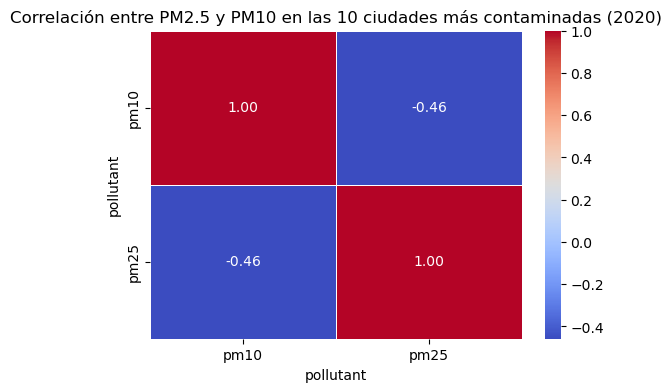

In [45]:
# Calcular la correlación entre PM2.5 y PM10 en 2020
correlation_2020 = df_pivot_2020.corr()

# Imprimir la matriz de correlación
print("Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2020):")
print(correlation_2020)

# Graficar la correlación con un mapa de calor
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_2020, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2020)')
plt.show()


c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\auth\_default.py:76: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\crist\anaconda3\envs\mec_fluit\Lib\site-packages\google\cloud\bigquery\table.py:1900: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


pollutant                                 pm10        pm25
year city                                                 
2019 BANNOCK                               NaN   95.300000
     BOUNDARY                              NaN   25.200000
     Bakersfield                     40.500000   12.500000
     COLUSA                          41.000000    9.066667
     Detroit-Warren-Livonia                NaN   51.500000
     El Centro                      117.000000    3.666667
     Malone                                NaN   31.200000
     Muskogee                        55.000000         NaN
     Visalia-Porterville             34.000000   15.000000
     Wichita                         40.000000         NaN
2020 Ann Arbor                             NaN   33.300000
     BETHEL                          37.000000   26.000000
     Columbia                        11.000000   56.600000
     FRA                                   NaN   91.571429
     POWDER RIVER                   132.000000   40.7000

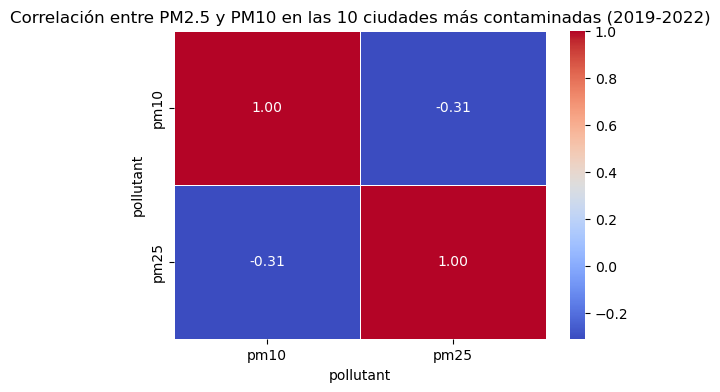

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery

# Inicializar cliente de BigQuery
client = bigquery.Client()

# Lista de años a analizar
years = [2019, 2020, 2021, 2022]

# Consulta SQL para obtener los datos de PM2.5 y PM10 en los 4 años
query = f"""
    SELECT 
      city, 
      pollutant, 
      EXTRACT(YEAR FROM timestamp) AS year, 
      AVG(value) AS avg_value  -- Promedio de los valores para cada contaminante
    FROM 
      `bigquery-public-data.openaq.global_air_quality`
    WHERE 
      country = 'US' 
      AND EXTRACT(YEAR FROM timestamp) IN ({','.join(map(str, years))}) 
      AND pollutant IN ('pm25', 'pm10')  -- Filtrar solo PM2.5 y PM10
    GROUP BY 
      city, pollutant, year
    ORDER BY 
      avg_value DESC  -- Ordenar por el valor promedio (de mayor a menor)
"""

# Ejecutar la consulta y obtener los resultados en un DataFrame
df_pollutants = client.query(query).to_dataframe()

# Filtrar las 10 ciudades más contaminadas para cada año
top_cities_per_year = df_pollutants.groupby(['year', 'city'])['avg_value'].mean().groupby('year').nlargest(10).reset_index(level=0, drop=True)
df_top_cities = df_pollutants[df_pollutants.set_index(['year', 'city']).index.isin(top_cities_per_year.index)]

# Agrupar por ciudad, año y contaminante
df_grouped = df_top_cities.groupby(['year', 'city', 'pollutant'], as_index=False)['avg_value'].mean()

# Pivotar los datos para que las ciudades sean filas y los contaminantes sean columnas
df_pivot = df_grouped.pivot(index=['year', 'city'], columns='pollutant', values='avg_value')

# Mostrar las primeras filas
print(df_pivot)

# Calcular la correlación entre PM2.5 y PM10 en todos los años
correlation_matrix = df_pivot.corr()

# Imprimir la matriz de correlación
print("\n📊 Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2019-2022):")
print(correlation_matrix)

# Graficar la correlación con un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlación entre PM2.5 y PM10 en las 10 ciudades más contaminadas (2019-2022)')
plt.show()
